# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('real_estate_data.csv',sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


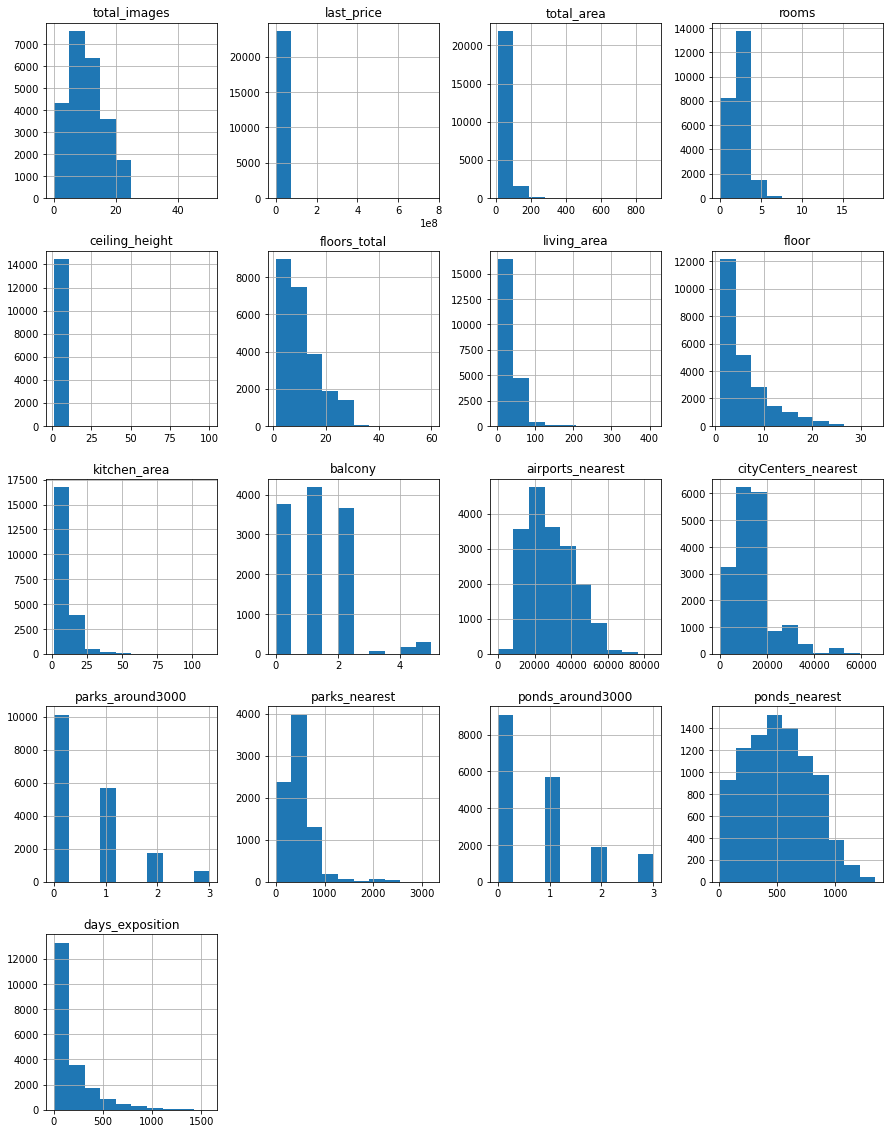

In [2]:
data.hist(figsize=(15, 20));

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
print(data.isna().sum().sum())
data.isna().sum()

101441


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

1. Огромное количество пропусков, 46718 значений пропущено, в том числе: высота потолков, жилая площадь, площадь кухни, информации о типе недвижимости, информация о количестве балконов.
2. Количество этажей в здании, водоемов, парков, балконов, дней размещения имеют тип значений с плавающей запятой, логично такие данные хранить и обрабатывать в формате целочисленных значений.

### 2. Предобработка данных

#### 2.1 Удаление пропусков, форматирование данных 

In [5]:
data['balcony'] = data['balcony'].fillna(0).astype('int') #Замена пропусков, замена на целочисленное значение 
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int') #Замена пропусков, замена на целочисленное значение 
data['is_apartment'] = data['is_apartment'].fillna(False) #Замена пропусков, замена на целочисленное значение
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int') #Замена пропусков, замена на целочисленное значение
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int') #Замена пропусков, замена на целочисленное значение
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') #Форматирование даты
data['total_area'] = data['total_area'].round(2)

Потолки пропуски

count    13734.000000
mean         2.681406
std          0.187649
min          2.000000
25%          2.500000
50%          2.640000
75%          2.760000
max          3.250000
Name: ceiling_height, dtype: float64


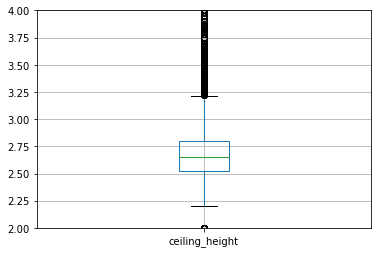

In [6]:
import matplotlib.pyplot as plt
plt.ylim(2,4)
data.boxplot('ceiling_height')
tru_ceiling_height = data[(data['ceiling_height'] <= 3.25) & (data['ceiling_height'] >= 2)]['ceiling_height'].reset_index(drop=True)
print(tru_ceiling_height.describe())
data['ceiling_height'] = data['ceiling_height'].fillna(tru_ceiling_height.median()).round(2)

Жилая площадь пропуски

In [7]:
tru_living_area = data[(data['living_area'] <= 80) & (data['living_area'] >= 1)]['living_area'].reset_index(drop=True)
print(tru_living_area.describe())

count    21110.000000
mean        31.748455
std         14.242826
min          2.000000
25%         18.462500
50%         30.000000
75%         41.000000
max         80.000000
Name: living_area, dtype: float64


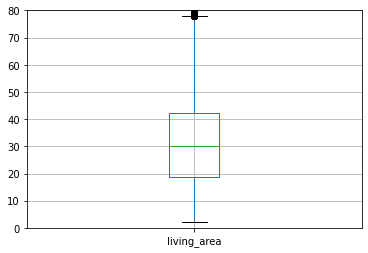

In [8]:
plt.ylim(0,80)
data.boxplot('living_area')
data['living_area'] = data['living_area'].fillna(tru_living_area.median()).round(2)

In [9]:
tru_kitchen_area = data[(data['kitchen_area'] <= 20) & (data['kitchen_area'] >= 1)]['kitchen_area'].reset_index(drop=True)
print(tru_kitchen_area.describe())

count    20398.00000
mean         9.59607
std          3.25999
min          1.30000
25%          7.00000
50%          9.00000
75%         11.20000
max         20.00000
Name: kitchen_area, dtype: float64


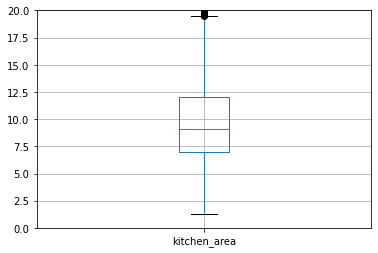

In [10]:
plt.ylim(0,20)
data.boxplot('kitchen_area')
data['kitchen_area'] = data['kitchen_area'].fillna(tru_living_area.median()).round(2)

Следуем следующей логике: если количество балконов не указано, то их в квартире нет; если отсутствует значение времени размещения объявления, значит объявление еще актуально, так же заменяем значения на целочисленные для удобства; если отсутствует информация о категории недвижимости (апартаменты), принимаем что эти объекты таковыми не являются и заменяем пустые значения на False; отсутствующие данные по количеству водоемов и парков в радиусе 3000 м. заполняем по аналогии с балконами. Высоту потолков, жилую и площадь кухни заполним медианой.

#### 2.2 Убираем аномалии потолков и квартиры в домах без этажей

In [11]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10 #Убираем аномально высокие потолки

data.dropna(axis = 0, how='any', subset =["floors_total"], inplace=True)

data.reset_index(drop=True) #Сбросили индексы
data['floors_total'] = data['floors_total'].astype('int') # Дробной части у этажа не бывает

In [12]:
#display(data['ceiling_height'].describe()) #Метровые потолки? Кладовые под лестницей?
display(data[data['ceiling_height'] < 2])
#Объявления выглядят реальными, есть фотографии, соотношение комнат к общей площади нормальное
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = data['ceiling_height'] + 1
# Сошлемся на ошибку, добьём до 2 метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.20,0,городской посёлок Мга,NaN,NaN,0,NaN,0,NaN,248
15061,19,5600000.0,56.4,2018-05-11,2,1.40,14,32.4,5,False,...,9.10,2,Санкт-Петербург,14814.0,13610.0,0,NaN,0,NaN,315
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71
22309,20,5300000.0,45.0,2017-09-30,1,1.03,16,15.5,15,False,...,30.00,0,Санкт-Петербург,36353.0,11936.0,2,440.0,2,450.0,136
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13


#### 2.3 Удаление дубликатов

In [13]:
#data['locality_name'].unique()
#data.groupby('locality_name')['locality_name'].count()
print(len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('деревня', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.lower()


365


In [14]:
print(len(data['locality_name'].unique()))
print(data['locality_name'].unique())

312
['санкт-петербург' 'поселок шушары' 'поселок янино-1' 'поселок парголово'
 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф' 'пушкин'
 'поселок кудрово' 'коммунар' 'колпино' 'поселок красный бор' 'гатчина'
 'поселок федоровское' 'выборг' 'кронштадт' 'кировск'
 'поселок новое девяткино' 'поселок металлострой' 'поселок лебяжье'
 'поселок сиверский' 'поселок молодцово' 'поселок кузьмоловский'
 'поселок новая ропша' 'павловск' 'поселок пикколово' 'всеволожск'
 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'поселок куттузи'
 'поселок аннино' 'поселок ефимовский' 'поселок плодовое'
 'поселок заклинье' 'поселок торковичи' 'поселок первомайское'
 'красное село' 'поселок понтонный' 'сясьстрой' 'поселок старая'
 'поселок лесколово' 'поселок новый свет' 'сланцы' 'село путилово'
 'ивангород' 'мурино' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'поселок оржицы' 'поселок кальтино' 'кудрово'
 'поселок романовка' 'поселок бугры' 'поселок рощино' 'кириши' 'луга'
 'волосово' 'отрадно

Удалили `53` дубликата

### 3. Посчитайте и добавьте в таблицу новые столбцы

In [15]:
data['price_per_square_meter'] = round(data['last_price']/data['total_area'], 2) # Цена одного квадратного метра
data['weekday'] = data['first_day_exposition'].dt.weekday # День недели публикации объявления
data['month'] = data['first_day_exposition'].dt.month # Месяц публикации объявления
data['year'] = data['first_day_exposition'].dt.year # Год публикации объявления
# Тип этажа квартиры
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)
# Расстояние до центра города в Км, до целых значений
# Была бы укрупненная группировка по районам/округам взял бы среднюю для заполнения пропусков, 
# не удаляя 5к пропусков использовал 'round(0)' для округления
data['cityCenters_nearest_Km'] = (data['cityCenters_nearest']/1000).round(0)

### 4. Проведите исследовательский анализ данных

#### 4.1 Общая площадь

In [16]:
data['total_area'].describe().round(2)

count    23613.00
mean        60.34
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.80
max        900.00
Name: total_area, dtype: float64

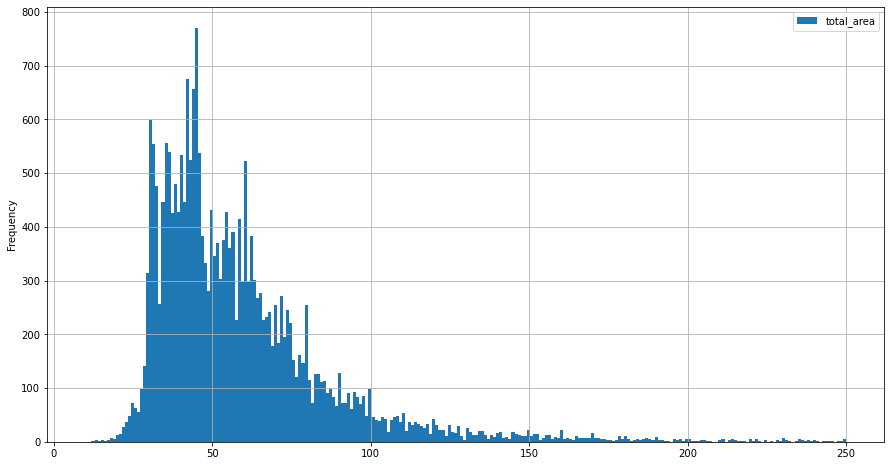

In [17]:
data.plot(y = 'total_area', kind = 'hist', bins = 250, grid=True, figsize = (15,8), range = (10,250));

Минимальная площадь квартиры составляет 12 м2, максимальная 900 м2. В среднем площадь составляет 52 м2

#### 4.2 Жилая площадь

In [18]:
data['living_area'].describe().round(2)

count    23613.00
mean        34.11
std         21.18
min          2.00
25%         19.00
50%         30.00
75%         41.10
max        409.70
Name: living_area, dtype: float64

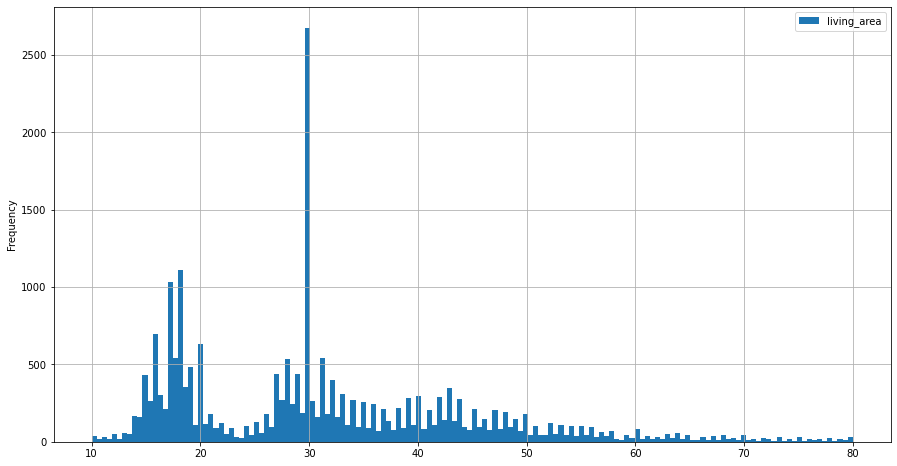

In [19]:
data.plot(y = 'living_area', kind = 'hist', bins = 150, grid=True, figsize = (15,8), range = (10,80));

Минимальная жилая площадь составляет 2 м2, максимальная 409 м2. В среднем жилая площадь составляет 30 м2

#### 4.3 Площадь кухни

In [20]:
data['kitchen_area'].describe().round(2)

count    23613.00
mean        12.40
std          7.99
min          1.30
25%          7.30
50%         10.00
75%         13.50
max        112.00
Name: kitchen_area, dtype: float64

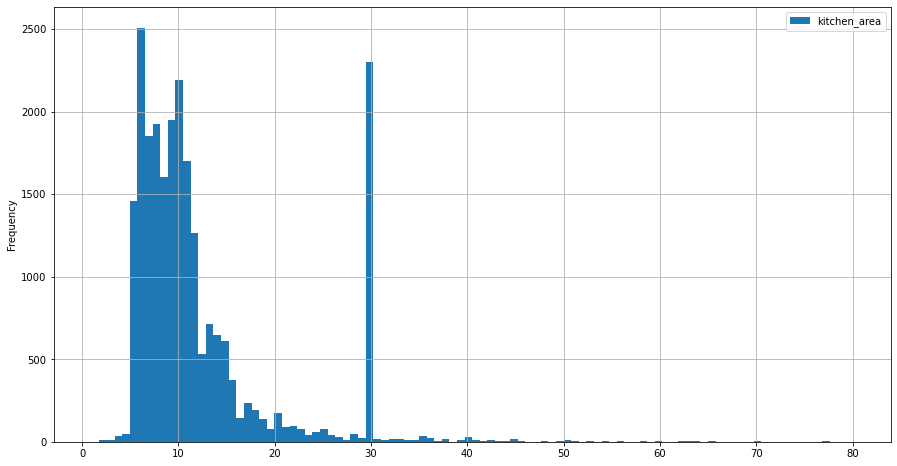

In [21]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (15,8), range = (1,80));

Минимальная площадь кухни составляет 1.3 м2, максимальная 112 м2. В среднем площадь кухни составляет 10 м2. Распределение Пуассона.

#### 4.4 Цена объекта

Минимальная цена:12,190.00
Максимальная цена:763,000,000.00
Средняя цена:6,540,555.46
Медиана:4,650,000.00


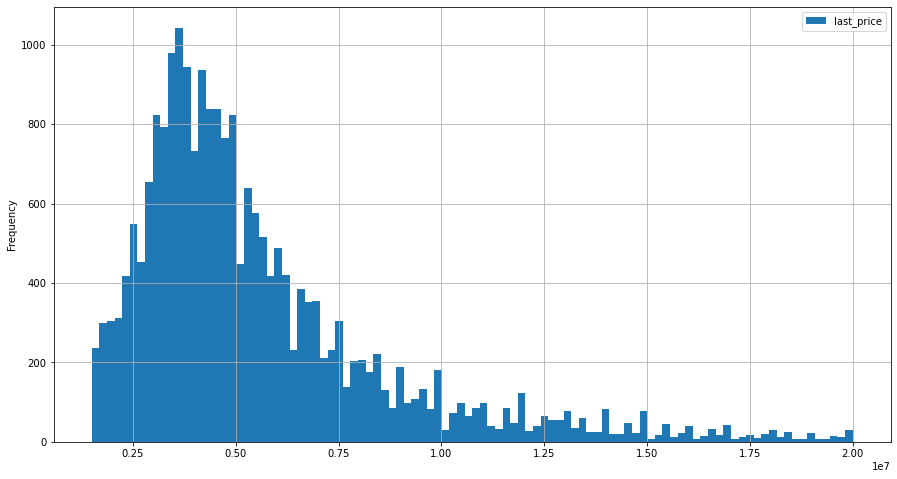

In [22]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (15,8), range = (1500000,20000000))
print(f"Минимальная цена:{data['last_price'].min():,.2f}")
print(f"Максимальная цена:{data['last_price'].max():,.2f}")
print(f"Средняя цена:{data['last_price'].mean():,.2f}")
print(f"Медиана:{data['last_price'].median():,.2f}")

Средняя цена объекта составляет `6 500 млн. рублей`

#### 4.5 Количество комнат

In [23]:
data['floor'].describe().round(2)

count    23613.00
mean         5.88
std          4.87
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64

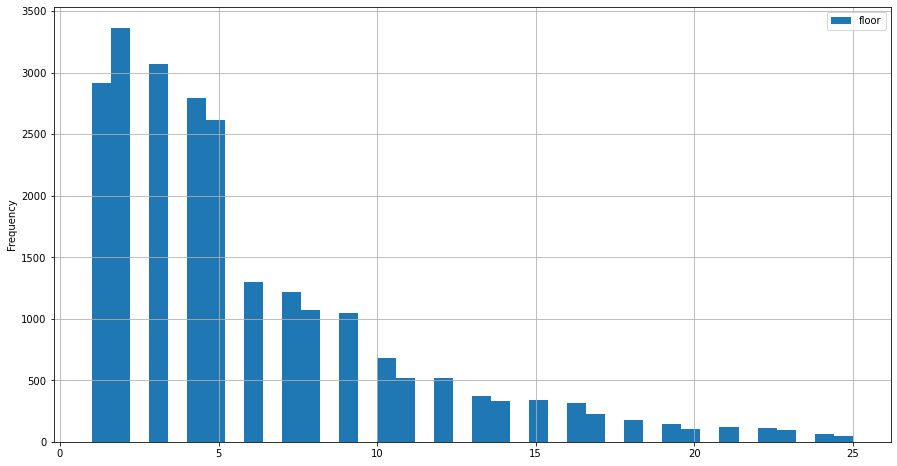

In [24]:
data.plot(y = 'floor', kind = 'hist', bins = 40, grid=True, figsize = (15,8), range = (1,25));

Большинство из представленных квартир имеют 2 жилые комнаты

#### 4.6 Высота потолков

In [25]:
data['ceiling_height'].describe().round(2)

count    23613.00
mean         2.69
std          0.24
min          2.00
25%          2.60
50%          2.64
75%          2.70
max         10.00
Name: ceiling_height, dtype: float64

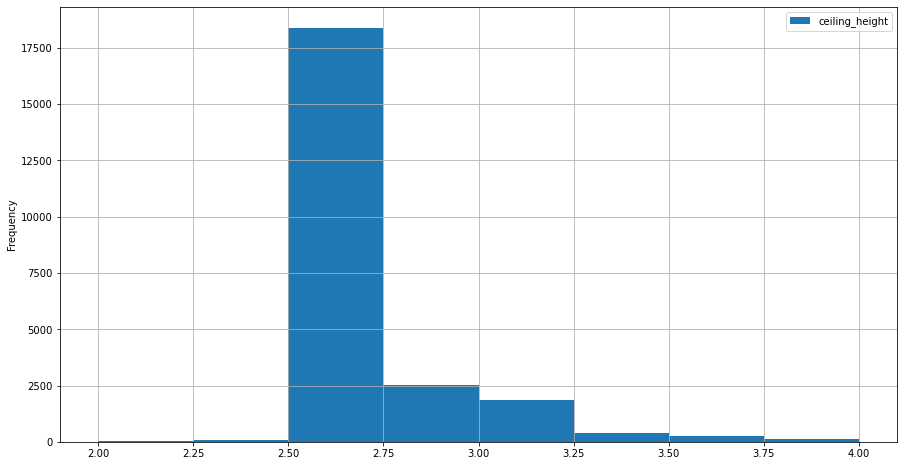

In [26]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 8, grid=True, figsize = (15,8), range = (2,4));

Средняя высота потолков составляет 2.65.

Распределение Гаусса.

#### 4.7 Этаж квартиры

In [27]:
data['floor'].describe().round(2)

count    23613.00
mean         5.88
std          4.87
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64

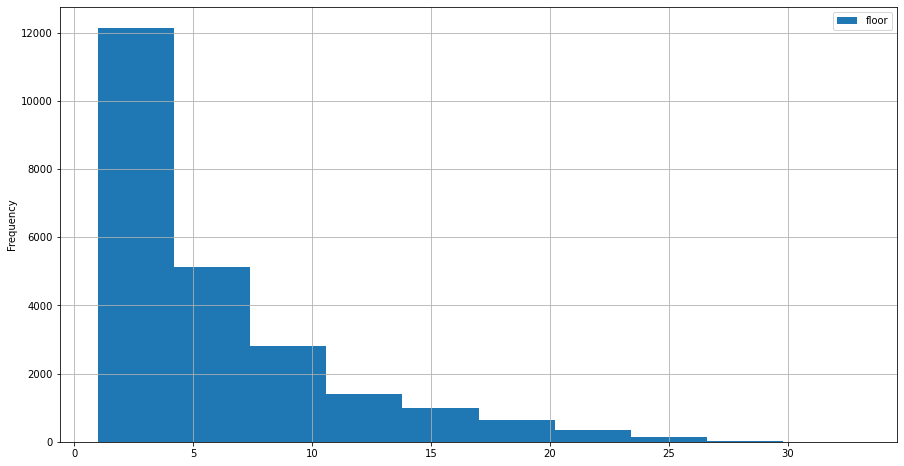

In [28]:
data.plot(y = 'floor', kind = 'hist', bins = 10, grid=True, figsize = (15,8), range = (1,33));

Большинство представленных квартир находятся на 3/4 этаже

#### 4.8 Тип этажа квартиры («первый», «последний», «другой»)

In [29]:
floor_category_total = data.pivot_table(index='floor_category',values='floor',aggfunc=('count','mean'))
floor_category_total['ratio'] = (floor_category_total['count']/floor_category_total['count'].sum()*100).round(2)
floor_category_total.round(2)

,count,mean,ratio
floor_category,,,
другой,17363,6.45,73.53
первый,2914,1.00,12.34
последний,3336,7.17,14.13


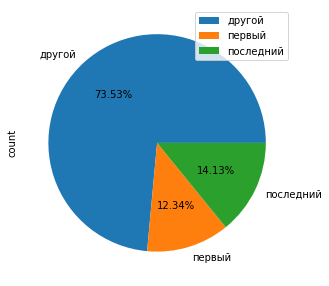

In [30]:
floor_category_total.plot(y='count', kind='pie',grid=True,autopct='%1.2f%%', figsize = (10,5));

Большинство квартир находится в категории `другой` 73,53 %, на `первом` этаже располагается 12,34 % квартир, квартиры на `последнем` этаже составляют 14,13 %

#### 4.9 Общее количество этажей в доме

In [31]:
data['floors_total'][data['floors_total']<30].describe().round(2)

count    23581.00
mean        10.64
std          6.53
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         29.00
Name: floors_total, dtype: float64

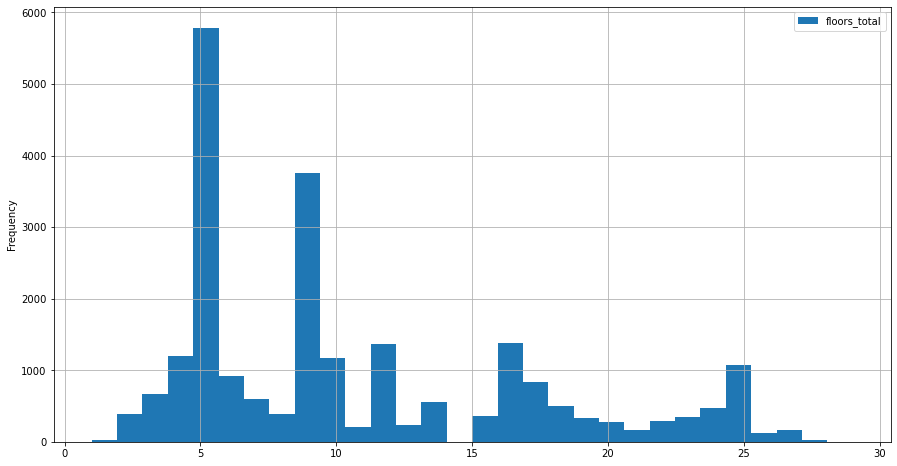

In [32]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (15,8), range = (1,29));

Большинство представленных квартир расположены в 5-ти и 9-ти этажных зданиях

#### 4.10 Расстояние до центра города в метрах

In [33]:
data['cityCenters_nearest'].describe().round(2)

count    18104.00
mean     14185.08
std       8614.13
min        181.00
25%       9233.75
50%      13093.00
75%      16287.00
max      65968.00
Name: cityCenters_nearest, dtype: float64

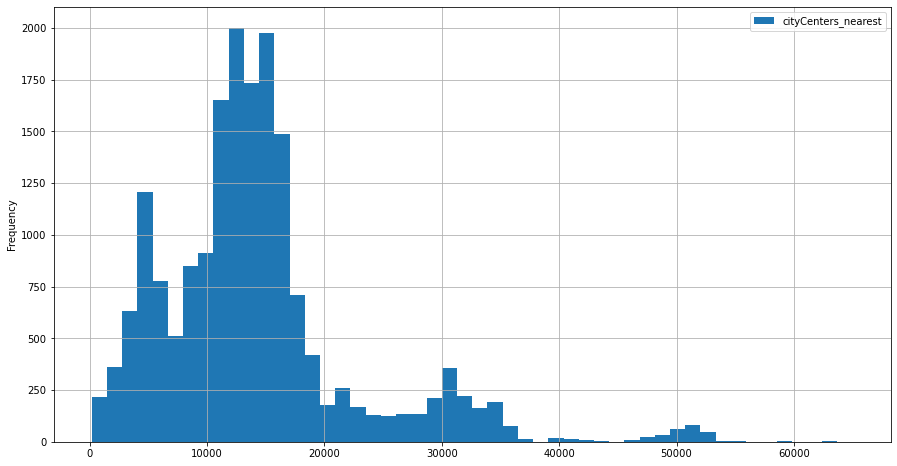

In [34]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 50, grid=True, figsize = (15,8), range = (180,65000));

Средняя отдаленность от центра города составляет 13000 м. Распределение Пуассона.

#### 4.11 Расстояние до ближайшего аэропорта

In [35]:
data['airports_nearest'].describe().round(2)

count    18081.00
mean     28788.01
std      12626.21
min          0.00
25%      18575.00
50%      26726.00
75%      37242.00
max      84869.00
Name: airports_nearest, dtype: float64

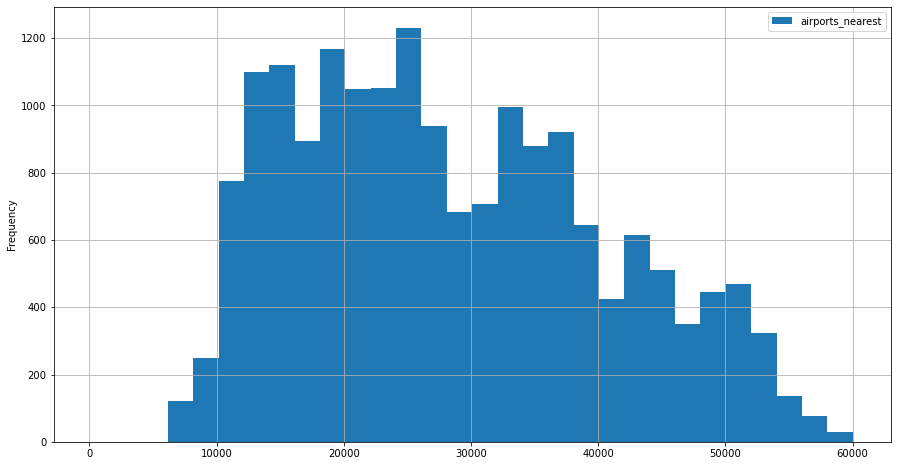

In [36]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, figsize = (15,8), range = (180,60000));

Средняя отдаленность от ближайшего аэропорта города составляет 26800 м. Распределение Гаусса.

#### 4.12 Расстояние до ближайшего парка

In [37]:
data['parks_nearest'].describe().round(2)

count    8045.00
mean      490.55
std       341.34
min         1.00
25%       288.00
50%       455.00
75%       612.00
max      3190.00
Name: parks_nearest, dtype: float64

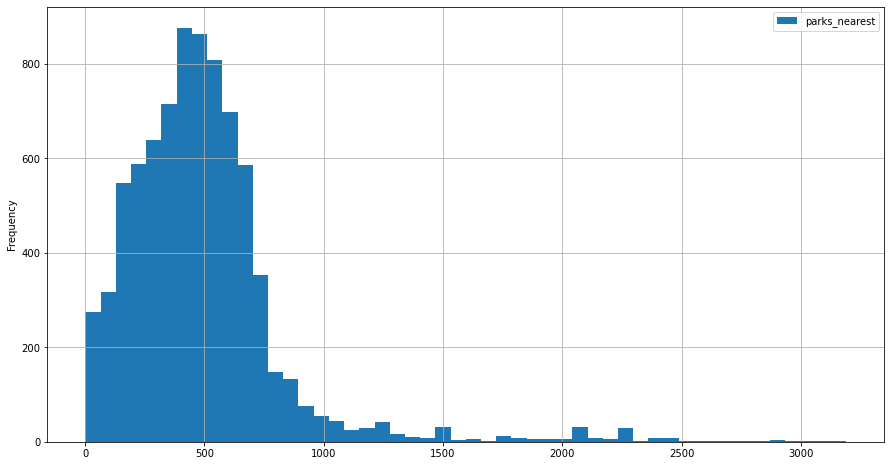

In [38]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, figsize = (15,8), range = (1,3190));

Средняя отдаленность от ближайшего парка составляет 450 м. Распределение Пуассона.

#### 4.13 День и месяц публикации объявления

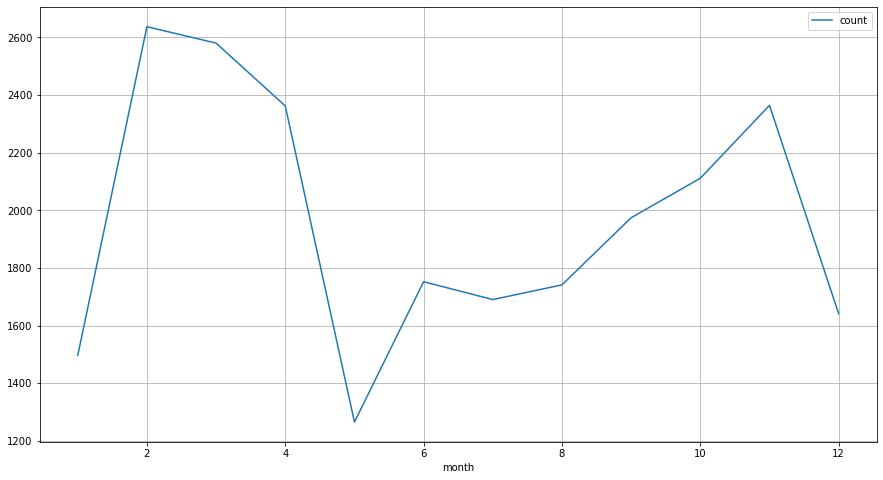

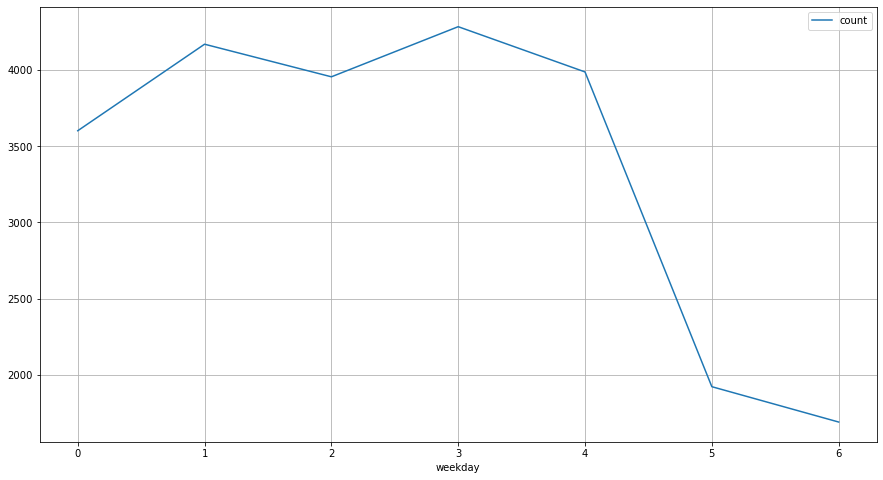

In [39]:
weekday_count = data.pivot_table(index='weekday',values='floor',aggfunc=('count'))
month_count = data.pivot_table(index='month',values='floor',aggfunc=('count'))
weekday_count.columns=['count']

month_count.columns=['count']
month_count.plot(grid=True,figsize = (15,8))
weekday_count.plot(grid=True,figsize = (15,8));

Наибольшее число объявлений публикуется со вторника по пятницу, пиковыми месяцами публикации объявлений являлись февраль, март и ноябрь

### 5. Изучите, как быстро продавались квартиры

#### 5.1 Строим гистограмму

In [40]:
print(data[(data['days_exposition'] > 0) & (data['days_exposition'] < 1580)]['days_exposition'].describe())

count    20440.000000
mean       180.816389
std        219.472824
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64


In [41]:
tru_days_exposition = data[(data['days_exposition'] != 45) & (data['days_exposition'] != 60) & (data['days_exposition'] != 0)]

In [42]:
print(tru_days_exposition['days_exposition'].describe())

count    19023.000000
mean       190.589655
std        224.716959
min          1.000000
25%         42.000000
50%        108.000000
75%        250.000000
max       1580.000000
Name: days_exposition, dtype: float64


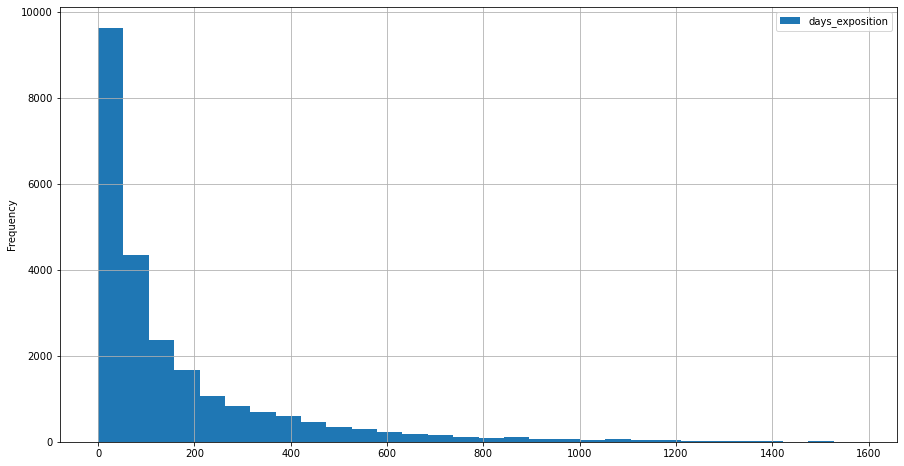

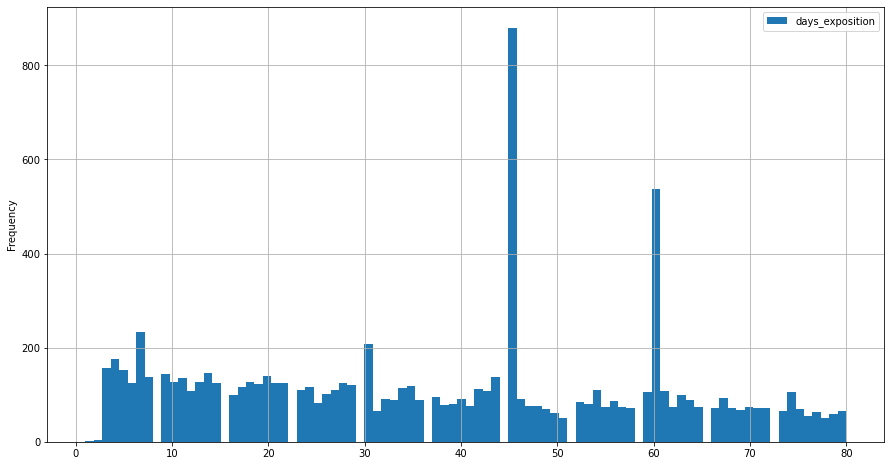

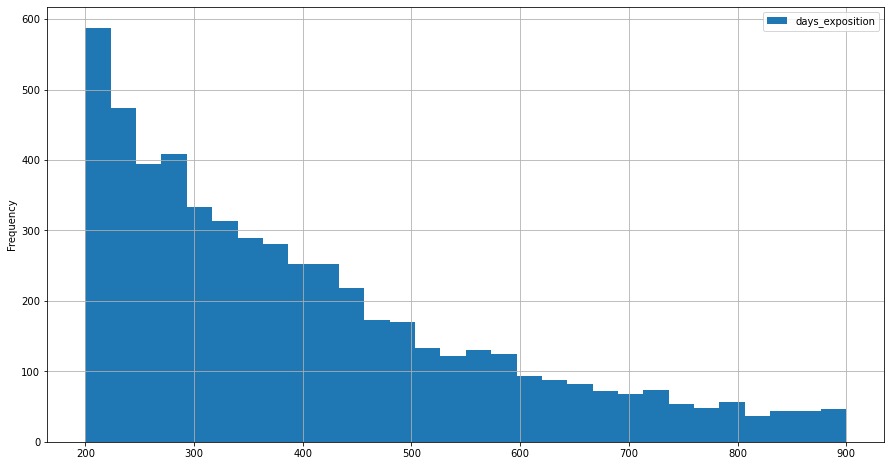

In [43]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, figsize = (15,8), range = (0,1580))
data.plot(y = 'days_exposition', kind = 'hist', bins = 90, grid = True, figsize = (15,8), range = (1,80))
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, figsize = (15,8), range = (200,900));

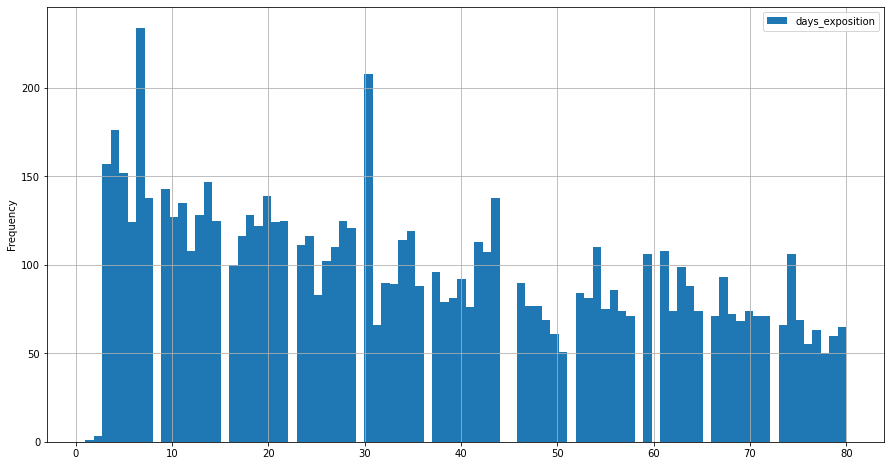

In [44]:
tru_days_exposition.plot(y = 'days_exposition', kind = 'hist', bins = 90, grid = True, figsize = (15,8), range = (1,80));

В среднем квартиры продаются от 45 до 90 дней, быстрыми продажами можно считать продажи до 50 дней, долгие продажи от 200 до 500 дней, необычно долгие продажи от 500 до 1580 дней. Необычно много продаж на 45 и 60 день публикации

### 6. Факторы влияющие на стоимость объекта 

#### 6.1 Зависит ли цена от общей площади

In [45]:
data['total_area'].corr(data['last_price'])

0.6535810085611218

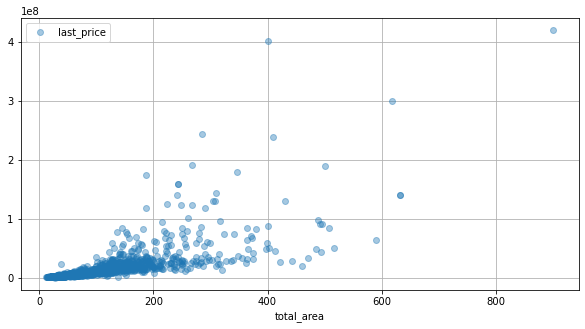

In [46]:
(
data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'median'])
.plot(y='median',style = 'o',alpha =0.4, grid = True , figsize=(10,5))
);

Слабая свзяь, с ростом общей площади цена увеличивается незначительно

#### 6.2 Зависит ли цена от жилой площади

In [47]:
data['living_area'].corr(data['last_price'])

0.5406082290786978

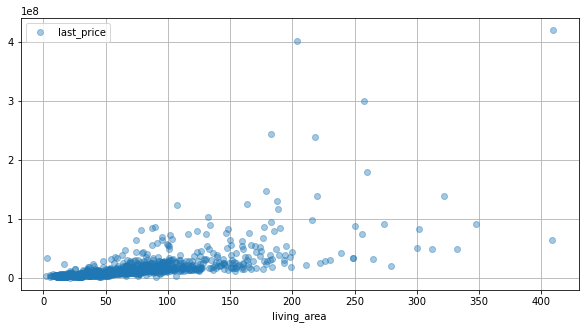

In [48]:
(
data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'median'])
.plot(y='median',style = 'o',alpha =0.4, grid = True , figsize=(10,5))
);

Слабая свзяь, с ростом жилой площади цена увеличивается незначительно

#### 6.3 Зависит ли цена от площади кухни

In [49]:
data['kitchen_area'].corr(data['last_price'])

0.31039222735521754

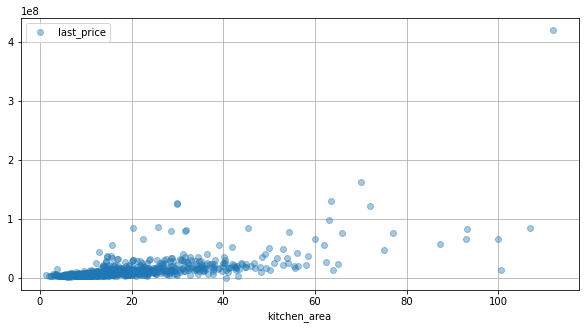

In [50]:
(
data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'median'])
.plot(y='median',style = 'o',alpha =0.4, grid = True , figsize=(10,5))
);

Слабая свзяь, с ростом площади кухни цена увеличивается незначительно

#### 6.4 Зависит ли цена от количества комнат

In [51]:
data['rooms'].corr(data['last_price'])

0.36312416659845503

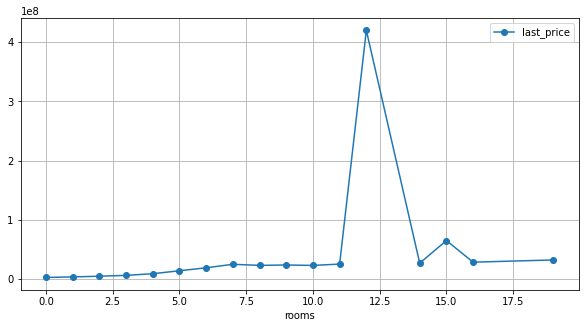

In [52]:
(
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'median'])
.plot(y='median',style = 'o-', grid = True , figsize=(10,5))
);

Слабая связь, с ростом количества комнат цена увеличивается незначительно

#### 6.5 Зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)

In [53]:
round((data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'median'])),2)

,mean,median
,last_price,last_price
floor_category,,
другой,6674074.18,4850000.0
первый,4805699.09,3900000.0
последний,7361024.84,4300000.0


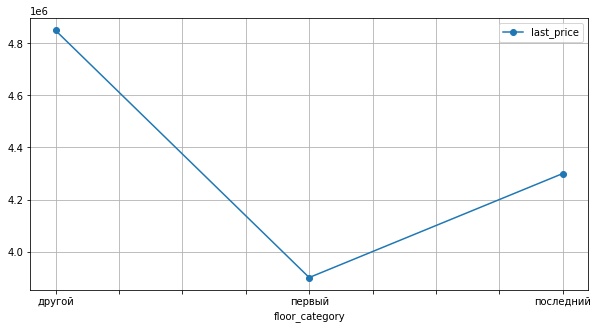

In [54]:
(
data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'median'])
.plot(y='median',style = 'o-', grid = True , figsize=(10,5))
);

Наиболее дешевые квартиры находятся на первом этаже, самые дорогие на любом кроме первого и последнего этажах

#### 6.6 Зависит ли цена от даты размещения (день недели, месяц, год)

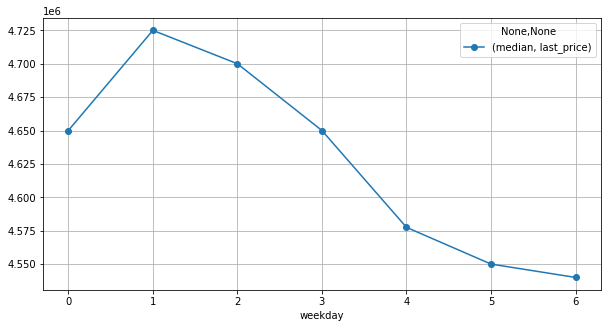

In [55]:
(
data.pivot_table(index = ['weekday'], values = 'last_price', aggfunc = ['mean', 'median','count'])
.plot(y=['median'],style = 'o-', grid = True , figsize=(10,5))
);

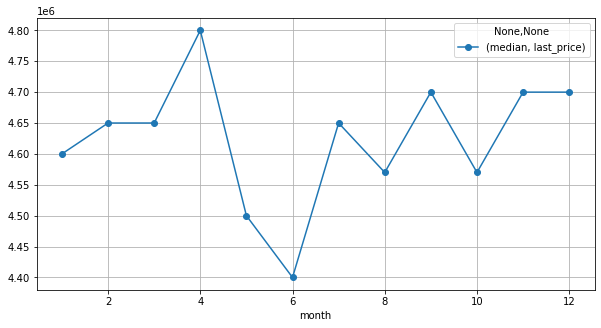

In [56]:
(
data.pivot_table(index = ['month'], values = 'last_price', aggfunc = ['mean', 'median','count'])
.plot(y=['median'],style = 'o-', grid = True , figsize=(10,5))
);

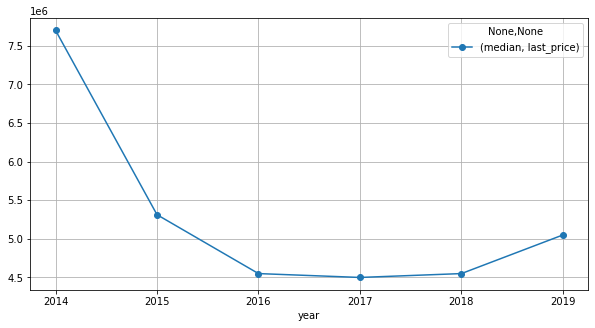

In [57]:
(
data.pivot_table(index = ['year'], values = 'last_price', aggfunc = ['mean', 'median','count'])
.plot(y=['median'],style = 'o-', grid = True , figsize=(10,5))
);

Самые дешевые объявления в выборке по дням недели публикуются в субботу. В выборке по месяцам самые выгодные объявления публиковались в мае, июне. В период 2014-2016 годов наблюдалось резкое снижение стоимости квартир

### 7. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [58]:
data_top10 = data.pivot_table(index='locality_name',values = 'price_per_square_meter', aggfunc = ['count','mean'])
data_top10.columns = ['count', 'mean']
data_top10 = data_top10.sort_values('count', ascending = False).head(10)

In [59]:
display(data_top10[(data_top10['mean'] == data_top10['mean'].max()) | (data_top10['mean'] == data_top10['mean'].min())].round(2))

,count,mean
locality_name,,
санкт-петербург,15651,114868.88
выборг,237,58141.91


In [60]:
display(data_top10.round(2))

,count,mean
locality_name,,
санкт-петербург,15651,114868.88
поселок мурино,552,85629.57
поселок шушары,439,78551.34
всеволожск,398,68654.47
пушкин,369,103125.82
колпино,338,75424.58
поселок парголово,327,90175.91
гатчина,307,68746.15
поселок кудрово,299,92473.55


Самый дорогой м2 в выборке среди 10 населенных пунктов с наибольшим числом объявлений находится в Санкт-Петербурге, самый дешевый в Выборге

### 8.  Выделите квартиры в Санкт-Петербурге, вычислите среднюю цену каждого километра. Как стоимость объектов зависит от расстояния до центра города.

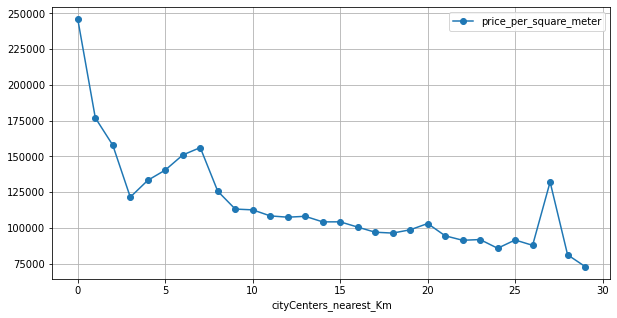

In [61]:
pivot_table_km = data.query('locality_name == "санкт-петербург"').pivot_table(index ='cityCenters_nearest_Km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km
pivot_table_km.plot(style = 'o-', grid = True , figsize=(10,5));

Как и ожидалось пиковая стоимость за м2 наблюдается в радиусе 2 км от центра, в диапазоне от 2 до 7 км наблюдается рост стоимости м2, есть непонятный скачок стоимости м2 в радиусе 27 км от центра

### Общий вывод

1. В среднем площадь квартир составляет 52 м2, средняя жилая площадь составляет 31 м2, кухни 10 м2.
2. Средняя цена квартир  6 500 000 рублей, наиболее дешевый м2 наблюдается у квартир находящихся на первом этаже, самый дорогой на любом кроме первого и последнего этажах, самый дорогой м2 в выборке среди 10 населенных пунктов с наибольшим числом объявлений находится в Санкт-Петербурге, самый дешевый в Выборге, пиковая стоимость за м2 наблюдается в радиусе 2 км от центра, в диапазоне от 2 до 7 км. Большинство представленных квартир имеют 2 жилые комнаты, высота потолков 2.77 м. Большинство квартир находятся на 3/4 этаже в 5-ти и 9-ти этажных МКД, в среднем отдаленность от центра города составляет 13000 м.
3. Средняя отдаленность от ближайшего аэропорта города составляет 26800 м.
4. Наибольшее число объявлений публикуется со вторника по пятницу, пиковыми месяцами публикации объявлений являлись февраль, март и ноябрь.
5. В среднем квартиры продаются от 45 до 90 дней, необычно много продаж на 45 и 60 день публикации. если взять за основу что продажи на 45 и 60 день выбросы, то граница быстрых продаж сдвигается на неделю.  Цена квартиры незначительно коррелирует с общей площадью, жилой площадью, площадью кухни.